In [1]:
import os
import torch
import matplotlib.pyplot as plt
from ddpm import Diffusion, UNet

In [2]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

    
dict_args = {}
args = dotdict(dict_args)
args.img_size = 64
args.device = 'cuda:1' if torch.cuda.is_available() else 'cpu'
args.pre_train_path = os.path.join(os.getcwd(), 'final' + '.pt')

model = UNet().to(args.device)
model.load_state_dict(torch.load(args.pre_train_path).state_dict())
diffusion = Diffusion(img_size=args.img_size, device=args.device)

In [3]:
def plot_images(images):
    plt.figure(figsize=(4, 4))
    plt.imshow(torch.cat([
        torch.cat([i for i in images.detach().cpu()], dim=-1),
    ], dim=-2).permute(1, 2, 0).cpu())
    plt.show()

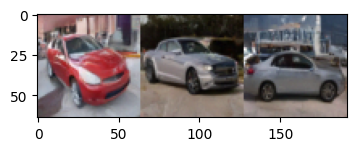

In [5]:
imgs = diffusion.sample_new_image(model, 3)
plot_images(imgs)